In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.network import Network
from src.data import Data
from src.tools import shade
import matplotlib

In [2]:
X = np.transpose(np.genfromtxt("data/xi.csv", delimiter=","))
Y = np.transpose(np.genfromtxt("data/tau.csv", delimiter=","))
N = 50

In [3]:
# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })

In [4]:
network = Network(N)

train, test = Data.sample(X, Y)
train_errors, test_errors = network.train(train, test, t_max=100)

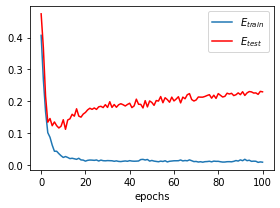

In [5]:
plt.figure(figsize=(4, 3))
plt.plot(train_errors, label="$E_{train}$")
plt.plot(test_errors, label="$E_{test}$", c="red")
plt.xlabel("epochs")
plt.legend()
plt.tight_layout()
# plt.savefig("pictures/train_base_error.pgf")

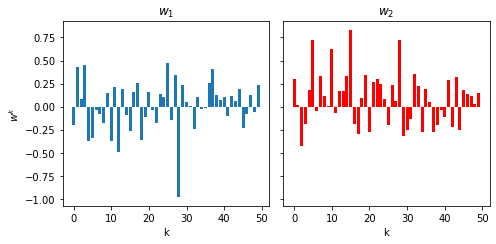

In [6]:
fig, plots = plt.subplots(1, 2, figsize=(7, 3.5), sharey=True)
colors = [None, "red"]
for i, (plot, layer, color) in enumerate(zip(plots, network.layers, colors)):
    plot.bar(np.arange(N), layer.weights, color=color)
    plot.set_xlabel("k")
    plot.set_title(f"$w_{i + 1}$")
plots[0].set_ylabel("$w^k$")
plt.tight_layout()
# plt.savefig("pictures/train_base_weight_vectors.pgf")

[-0.20352446  0.42809019  0.07770554  0.44728102 -0.37127267 -0.33776383
 -0.03611383 -0.07520101 -0.17417172  0.14563461 -0.37331224  0.21524287
 -0.48796849  0.18770561 -0.08889017 -0.25951155  0.16153808  0.25382675
 -0.36430955 -0.11462705  0.1638552  -0.03673792 -0.17688482  0.13966453
  0.10073602  0.46905619 -0.14254939  0.34684089 -0.9845976   0.23883768
  0.04973153  0.00934251 -0.23973844  0.10172288 -0.03026776 -0.01444022
  0.25602148  0.40977679  0.123999    0.07233018  0.10073888 -0.10091419
  0.11421147  0.0641877   0.19092348 -0.23366602 -0.08370734  0.12881342
 -0.05316687  0.23200143]
[ 0.29521241  0.02239813 -0.42508611 -0.19367416  0.17699392  0.72494186
 -0.05094577  0.33177789  0.11218905  0.0048574   0.62253333 -0.07219627
  0.17102384  0.1647862   0.33567432  0.83361637 -0.18612048 -0.29508142
  0.09659991  0.34769626 -0.27800916  0.26973918  0.29620094  0.24061965
  0.08240503 -0.1956176   0.22945815  0.06201851  0.72098821 -0.31800179
 -0.25375257 -0.13551882 

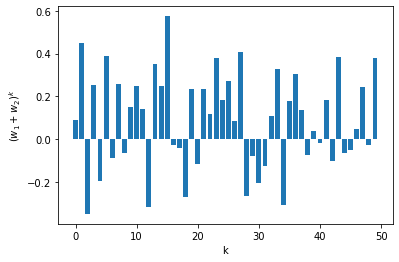

In [7]:
plt.close()
print(network.layers[0].weights)
print(network.layers[1].weights)
plt.bar(np.arange(N), np.sum(np.array([network.layers[0].weights, network.layers[1].weights]), axis=0))
plt.xlabel("k")
plt.ylabel("$(w_1+w_2)^k$")
plt.show()
# plt.savefig("pictures/train_base_weight_vectors_sum.pgf")

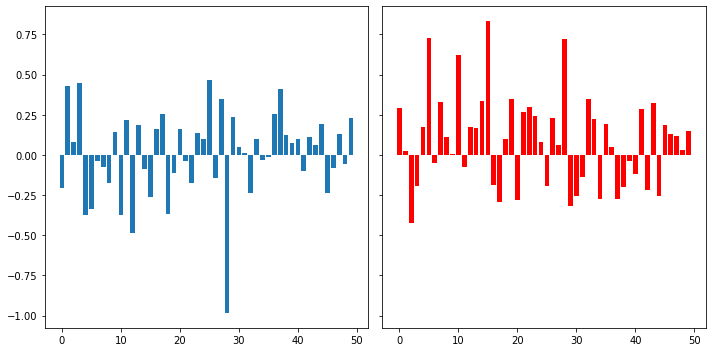

In [8]:
fig, plots = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
colors = [None, "red"]
for plot, layer, color in zip(plots, network.layers, colors):
    plot.bar(np.arange(N), layer.weights, color=color)
plt.tight_layout()

In [9]:
P_range = np.array([20, 50, 200, 500, 1000, 2000])
n = 10

train_errors = []
test_errors = []

for P in P_range:
    print(f"Doing {P = }")
    
    train_errors_acc = []
    test_errors_acc = []

    for _ in range(n):
        network = Network(N)
        train, test = Data.sample(X, Y, P=P)
        train_error, test_error = network.train(train, test)

        train_errors_acc.append(train_error)
        test_errors_acc.append(test_error)

    train_errors.append(np.mean(train_errors_acc, axis=0))
    test_errors.append(np.mean(test_errors_acc, axis=0))

Doing P = 20
Doing P = 50
Doing P = 200
Doing P = 500
Doing P = 1000
Doing P = 2000


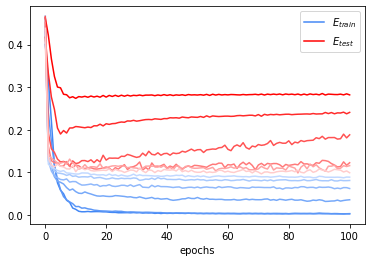

In [10]:
colors = shade("#4287f5", "#c2d9ff", P_range.size)

for i, (train_error, test_error, P, color) in enumerate(zip(train_errors, test_errors, P_range, colors)):
    plt.plot(train_error, c=color, label="$E_{train}$" if i == 0 else None)

colors = shade("#ff0000", "#ffcccc", P_range.size)

for i, (train_error, test_error, P, color) in enumerate(zip(train_errors, test_errors, P_range, colors)):
    plt.plot(test_error, c=color, label="$E_{test}$" if i == 0 else None)

plt.xlabel("epochs")
plt.legend()
# plt.savefig("pictures/effect_p.pgf")

<BarContainer object of 50 artists>

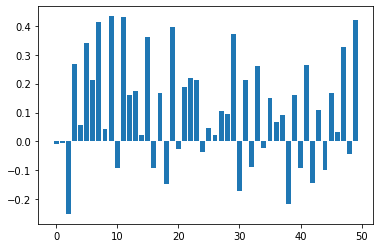

In [11]:
max_w = None
min_w = None

weights_sum = np.sum([layer.weights for layer in network.layers], axis=0)
plt.bar(np.arange(N), weights_sum)